# ベンチマーク関数 標準誤差機能 の使い方

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenJij/OpenJijTutorial/blob/master/source/ja/2-Evaluation_errorbar.ipynb)

ベンチマーク関数に追加した標準誤差機能の使い方を解説します。  

## ライブラリのインストール、モデルの準備
OpenJij のリポジトリから Fork した自分のリポジトリ内に、さらに feature/error_bar リポジトリを branch しました。
標準誤差関数が実装されるまでは、自分のGitHubから、 OpenJij をインストールして、実行ができます。  

反強磁性1次元イジングモデルの準備

In [ ]:
#!pip install -U cmake
#!pip install git+https://github.com/kumagaimasahito/OpenJij.git@feature/error_bar

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import openjij as oj

# 反強磁性1次元イジングモデル を作る
N = 30
h = {0: -10}
J = {(i, i+1): 1 for i in range(N-1)}

## ベンチマーク関数
呼び出し方は、今まで通りです。

引数に変化はありません。  
返り値として、以下の計算結果が新たに辞書型で格納されるようにしました。  

- se_success_prob: 成功確率の標準誤差のリスト  
      iteration 回アニーリング時、成功確率の期待値の標準偏差  
      step_num ごとに、格納されている

- se_residual_energy: 残留エネルギーの標準誤差のリスト  
      iteration 回アニーリング時の、残留エネルギー値の平均の標準偏差  
      step_num ごとに、格納されている

- se_lower_tts: TTSの下位誤差のリスト
      成功確率の上位誤差を基に算出したTTSの下位誤差

- se_upper_tts: TTSの上位誤差のリスト
      成功確率の下位誤差を基に算出したTTSの下位誤差

In [6]:
# 最適解
correct_state = [(-1)**i for i in range(N)]

# ステップ数とアニーリングの反復数を与えます
step_num_list = list(range(10, 101, 5))
iteration = 100

# benchmark 関数で TTS 残留エネルギー 成功確率 標本平均 標準誤差を計算
sampler = oj.SASampler(num_reads=iteration)
result = oj.solver_benchmark(
                      solver=lambda time, **args: sampler.sample_ising(h,J,num_sweeps=time), 
                      time_list=step_num_list, solutions=[correct_state], p_r=0.99
            )

In [3]:
# seaborn を使うとグラフが見やすくなる
# !pip install seaborn
import seaborn as sns
sns.set()

### TTS 残留エネルギー 成功確率
TTS 残留エネルギー 成功確率 の可視化は今まで通りできます。

Text(0, 0.5, 'Success probability')

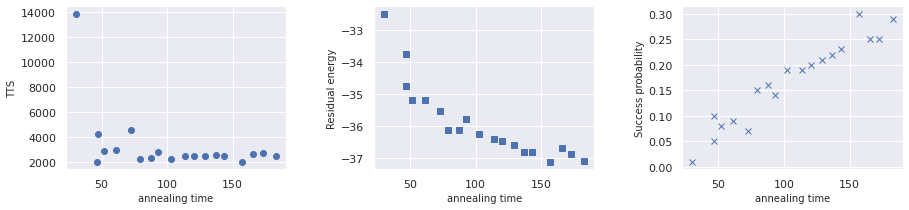

In [7]:
fig, (axL,axC,axR) = plt.subplots(ncols=3, figsize=(15,3))
plt.subplots_adjust(wspace=0.4)

fontsize = 10
axL.plot(result['time'], result['tts'], 'o')
axL.set_xlabel('annealing time', fontsize=fontsize)
axL.set_ylabel('TTS', fontsize=fontsize)

axC.plot(result['time'], result['residual_energy'], 's')
axC.set_xlabel('annealing time', fontsize=fontsize)
axC.set_ylabel('Residual energy', fontsize=fontsize)

axR.plot(result['time'], result['success_prob'], 'x')
axR.set_xlabel('annealing time', fontsize=fontsize)
axR.set_ylabel('Success probability', fontsize=fontsize)

### 標準誤差
標準誤差は、se_success_probとse_residual_energyに格納されています。  
これらを使えば、標準誤差のエラーバーを表示できます。

In [8]:
# 標準誤差の確認
print(result['se_upper_tts'])
print(result['se_lower_tts'])
print(result['se_residual_energy'])
print(result['se_success_prob'])

[15511.176999319847, 5619.511284890235, 3226.4903087590933, 4234.242764027873, 4573.901326731409, 6580.447098277759, 4188.2882130981925, 4466.618779056758, 5111.738879626055, 4810.28730445078, 5336.628067336749, 5529.248445300416, 5819.18519922923, 6092.7773332539855, 6298.5977616206155, 6951.14793374517, 7190.723520506501, 7499.978056421167, 8013.77310621262]
[12680.194185285995, 3529.280642901674, 1623.0668219375632, 2315.454062343464, 2397.5336631852456, 3759.836463686256, 1731.126877161621, 1776.2622972206239, 2196.05767047673, 1702.2481250580822, 1888.5078056254538, 1880.8008175672032, 1901.7188224036308, 1911.8026439136206, 1896.2841561022046, 1518.5006873048635, 1987.7185830464211, 2073.2052501635685, 1840.8630636522003]
[2.8902483203931375, 2.6784587758898613, 2.449984539221471, 2.0907685503931637, 2.1555659689428777, 1.860921896004855, 1.8910741963660802, 1.9950443654721113, 1.9673085752629227, 1.880898130622118, 1.7638342073763935, 1.7489968264665032, 1.688822433567606, 1.620

Text(0, 0.5, 'Success probability')

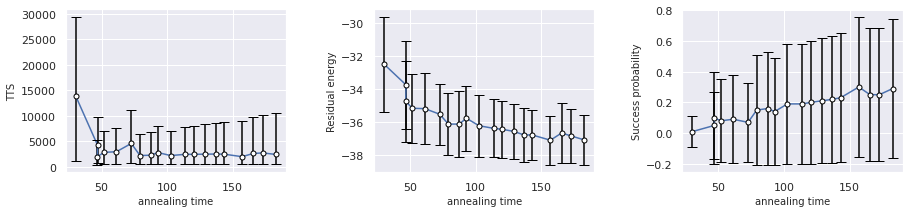

In [9]:
fig, (axL,axC,axR) = plt.subplots(ncols=3, figsize=(15,3))
plt.subplots_adjust(wspace=0.4)

fontsize = 10
axL.plot(result['time'], result['tts'])
axL.errorbar(result['time'], result['tts'], yerr = (result['se_lower_tts'],result['se_upper_tts']), capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axL.set_xlabel('annealing time', fontsize=fontsize)
axL.set_ylabel('TTS', fontsize=fontsize)

axC.plot(result['time'], result['residual_energy'])
axC.errorbar(result['time'], result['residual_energy'], yerr = result['se_residual_energy'], capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axC.set_xlabel('annealing time', fontsize=fontsize)
axC.set_ylabel('Residual energy', fontsize=fontsize)

axR.plot(result['time'], result['success_prob'])
axR.errorbar(result['time'], result['success_prob'], yerr = result['se_success_prob'], capsize=5, fmt='o', markersize=5, ecolor='black', markeredgecolor = "black", color='w')
axR.set_xlabel('annealing time', fontsize=fontsize)
axR.set_ylabel('Success probability', fontsize=fontsize)

1回のアニーリング時間が延びると、残留エネルギーについて標準誤差のエラーバーが短くなっていくことが確認できました。